In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

 11065301_740801319373728_5144881085827417654_n.jpg
'111 1.jpg'
'111 2.jpg'
'11 1.jpg'
'11 2.jpg'
'1V 1.jpg'
'1V 2.jpg'
'2014-04-04 19.53.31.jpg'
 24-09-2019.gsheet
'26 sep 2019 stack and queue .gsheet'
 52312.jpg
 52313.jpg
 52314.jpg
 52315.jpg
 52318.jpg
 52319.jpg
 52321.jpg
 52323.jpg
 52325.jpg
 52329.jpg
 52332.jpg
 52334.jpg
 52335.jpg
 52336.jpg
 52344.jpg
 52345.jpg
 52346.jpg
 52347.jpg
 52349.jpg
 52351.jpg
 52358.jpg
 52359.jpg
 52361.jpg
 52362.jpg
 52363.jpg
 52364.jpg
 52365.jpg
 52366.jpg
 52372.jpg
 52375.jpg
 52376.jpg
 52377.jpg
 52381.jpg
 52382.jpg
 52384.jpg
 5238.jpg
 52390.jpg
 52392.jpg
 52395.jpg
 52396.jpg
 52398.jpg
 52399.jpg
 5239.jpg
 52401.jpg
 52406.jpg
 52407.jpg
 52411.jpg
 52412.jpg
 52413.jpg
 52415.jpg
 52416.jpg
 5241.jpg
 52420.jpg
 52423.jpg
 52426.jpg
 52429.jpg
 52430.jpg
 52432.jpg
 52433.jpg
 52435.jpg
 52437.jpg
 52439.jpg
 52441.jpg
 52443.jpg
 52444.jpg
 52453.jpg
 52454.jpg
 52455.jpg
 52457.jpg
 52462.jpg
 52464.jpg
 52465.jpg
 52467.j

In [ ]:
!fairfaceequ ls

/bin/bash: fairfaceequ: command not found


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
!unzip fairfaceequ.zip

Streaming output truncated to the last 5000 lines.
  inflating: fairfaceequ/Validation/Female/3632.jpg  
  inflating: fairfaceequ/Validation/Female/2538.jpg  
  inflating: fairfaceequ/Validation/Female/6986.jpg  
  inflating: fairfaceequ/Validation/Female/8773.jpg  
  inflating: fairfaceequ/Validation/Female/7440.jpg  
  inflating: fairfaceequ/Validation/Female/8015.jpg  
  inflating: fairfaceequ/Validation/Female/7326.jpg  
  inflating: fairfaceequ/Validation/Female/1757.jpg  
  inflating: fairfaceequ/Validation/Female/10719.jpg  
  inflating: fairfaceequ/Validation/Female/3140.jpg  
  inflating: fairfaceequ/Validation/Female/228.jpg  
  inflating: fairfaceequ/Validation/Female/1964.jpg  
  inflating: fairfaceequ/Validation/Female/8798.jpg  
  inflating: fairfaceequ/Validation/Female/8940.jpg  
  inflating: fairfaceequ/Validation/Female/10094.jpg  
  inflating: fairfaceequ/Validation/Female/6979.jpg  
  inflating: fairfaceequ/Validation/Female/9492.jpg  
  inflating: fairfaceequ/Valid

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import random
import numpy as np

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
train_transforms = transforms.Compose([
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomRotation(10),
                           transforms.RandomCrop((224, 224), pad_if_needed=True),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

test_transforms = transforms.Compose([
                           transforms.CenterCrop((224, 224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

In [ ]:
train_data = datasets.ImageFolder('fairfaceequ/Training', train_transforms)
valid_data = datasets.ImageFolder('fairfaceequ/Validation', test_transforms)
#test_data = datasets.ImageFolder('fairfaceequ/Validation/Male/1.jpg', test_transforms)

#import os

#print(len(os.listdir('data/dogs-vs-cats/train')))

#n_train_examples = int(len(train_data)*0.9)
#n_valid_examples = n_test_examples = len(train_data) - n_train_examples

#train_data, valid_data = torch.utils.data.random_split(train_data, [n_train_examples, n_valid_examples])
#train_data, test_data = torch.utils.data.random_split(train_data, [n_train_examples-n_valid_examples, n_test_examples])

In [ ]:
print(valid_data.class_to_idx)

{'Female': 0, 'Male': 1}


https://github.com/facebook/fb.resnet.torch/issues/180
https://github.com/bamos/densenet.pytorch/blob/master/compute-cifar10-mean.py

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
#print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 85902
Number of validation examples: 10836


In [ ]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
valid_iterator = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE)
#test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

https://discuss.pytorch.org/t/why-does-the-resnet-model-given-by-pytorch-omit-biases-from-the-convolutional-layer/10990/4
https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

In [ ]:
device = torch.device('cuda')

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torch.optim import lr_scheduler


num_ftrs = model.fc.in_features
model.fc = nn.Linear(512, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
from torch.optim import lr_scheduler


num_ftrs = model.fc.in_features
model.fc = nn.Linear(512, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999),eps=1e-08, weight_decay=0, amsgrad=False)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
def calculate_accuracy(fx, y):
    preds = fx.max(1, keepdim=True)[1]
    correct = preds.eq(y.view_as(preds)).sum()
    acc = correct.float()/preds.shape[0]
    return acc

In [ ]:
def train(model, device, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        fx = model(x)
        
        loss = criterion(fx, y)
        
        acc = calculate_accuracy(fx, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, device, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
EPOCHS = 50
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

| Epoch: 01 | Train Loss: 0.582 | Train Acc: 68.48% | Val. Loss: 0.510 | Val. Acc: 74.32% |
| Epoch: 02 | Train Loss: 0.460 | Train Acc: 77.60% | Val. Loss: 0.415 | Val. Acc: 80.76% |
| Epoch: 03 | Train Loss: 0.408 | Train Acc: 80.68% | Val. Loss: 0.381 | Val. Acc: 82.27% |
| Epoch: 04 | Train Loss: 0.374 | Train Acc: 82.59% | Val. Loss: 0.358 | Val. Acc: 83.34% |
| Epoch: 05 | Train Loss: 0.353 | Train Acc: 83.79% | Val. Loss: 0.344 | Val. Acc: 84.01% |
| Epoch: 06 | Train Loss: 0.337 | Train Acc: 84.62% | Val. Loss: 0.334 | Val. Acc: 84.72% |
| Epoch: 07 | Train Loss: 0.323 | Train Acc: 85.45% | Val. Loss: 0.319 | Val. Acc: 85.49% |
| Epoch: 08 | Train Loss: 0.312 | Train Acc: 85.90% | Val. Loss: 0.313 | Val. Acc: 85.85% |
| Epoch: 09 | Train Loss: 0.300 | Train Acc: 86.64% | Val. Loss: 0.303 | Val. Acc: 86.65% |
| Epoch: 10 | Train Loss: 0.291 | Train Acc: 87.01% | Val. Loss: 0.297 | Val. Acc: 86.83% |
| Epoch: 11 | Train Loss: 0.284 | Train Acc: 87.29% | Val. Loss: 0.292 | Val. Ac

In [ ]:
EPOCHS = 60
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'ColabEquilization-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

| Epoch: 01 | Train Loss: 0.578 | Train Acc: 69.01% | Val. Loss: 0.509 | Val. Acc: 74.42% |
| Epoch: 02 | Train Loss: 0.465 | Train Acc: 77.35% | Val. Loss: 0.429 | Val. Acc: 79.38% |
| Epoch: 03 | Train Loss: 0.408 | Train Acc: 80.65% | Val. Loss: 0.383 | Val. Acc: 82.27% |
| Epoch: 04 | Train Loss: 0.372 | Train Acc: 82.73% | Val. Loss: 0.356 | Val. Acc: 83.89% |
| Epoch: 05 | Train Loss: 0.350 | Train Acc: 83.93% | Val. Loss: 0.341 | Val. Acc: 84.66% |
| Epoch: 06 | Train Loss: 0.336 | Train Acc: 84.71% | Val. Loss: 0.325 | Val. Acc: 85.34% |
| Epoch: 07 | Train Loss: 0.321 | Train Acc: 85.39% | Val. Loss: 0.315 | Val. Acc: 85.98% |
| Epoch: 08 | Train Loss: 0.310 | Train Acc: 86.00% | Val. Loss: 0.304 | Val. Acc: 86.46% |
| Epoch: 09 | Train Loss: 0.299 | Train Acc: 86.58% | Val. Loss: 0.296 | Val. Acc: 86.67% |
| Epoch: 10 | Train Loss: 0.291 | Train Acc: 86.98% | Val. Loss: 0.289 | Val. Acc: 87.21% |
| Epoch: 11 | Train Loss: 0.283 | Train Acc: 87.37% | Val. Loss: 0.282 | Val. Ac

In [ ]:
test_data = datasets.ImageFolder('fairfaceequ/Validation', test_transforms)


test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
model.load_state_dict(torch.load('models/ResentFT-males-vs-females.pt'))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')

| Test Loss: 0.244 | Test Acc: 89.71% |


In [ ]:
import matplotlib.pyplot as plt
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.savefig('loss_curve.png')
plt.show()

In [ ]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('accuracy_curve.png')
plt.show()

In [ ]:
print(optimizer.state_dict())

f = open( 'test_optimizer_state_dict.txt', 'w' )
f.write( 'test_optimizer_state_dict = ' + repr(optimizer.state_dict()) + '\n' )
f.close()

In [ ]:
#print(model.state_dict())

f = open( 'test_model_state_dict.txt', 'w' )
f.write( 'test_model_state_dict = ' + repr(model.state_dict()) + '\n' )
f.close()

In [ ]:
dict = {'one': 1, 'two': 2}
f = open( 'test123.txt', 'w' )
f.write( 'dict = ' + repr(dict) + '\n' )
f.close()

In [ ]:
print(history[:,3:4])
flat_list = [item for sublist in history[:,3:4] for item in sublist]

In [ ]:
best_acc=max(flat_list)
print(best_acc)

In [ ]:
#trial1 = torch.load('epoch_60.pt')
#print(trial1)
#print(model)
import shutil
def save_checkpoint123(state123, is_best123, filename123='checkpoint.pth.tar'):
    torch.save(state123, filename123)
    if is_best123:
        shutil.copyfile(filename123, 'model_best.pth.tar')
        
save_checkpoint123({
            'epoch': epoch + 1,
            'arch': 'resnet50',
            'state_dict': model.state_dict(),
            'best_prec1': best_acc,
            'optimizer' : optimizer.state_dict(),
            'all_history': history,
            'exp_lr_scheduler_dict' : exp_lr_scheduler.state_dict(),
        }, True)

In [ ]:
resume = 'model_best.pth.tar'
if resume:
        if os.path.isfile(resume):
            print("=> loading checkpoint '{}'".format(resume))
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            all_history = (checkpoint['all_history']).tolist()
            exp_lr_scheduler = checkpoint['exp_lr_scheduler_dict']
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(resume, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

In [ ]:
print(start_epoch)
print(all_history)
history = all_history

In [ ]:
EPOCHS = 5
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'Resnet50_face_recognition_v1.pt')

best_valid_loss = 1.663

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
#history = []
for epoch in range(start_epoch,start_epoch+EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')
    

In [ ]:
model.load_state_dict(torch.load('models/Resnet50_face_recognition_v1.pt'))
test_data = datasets.ImageFolder(dataset+'\\validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 460


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

In [ ]:
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))
Ind_acc = confusion_matrix.diag()/confusion_matrix.sum(1)
print("Female : ", float(Ind_acc[0]))s
print("Male : ", float(Ind_acc[1]))
TN = int(confusion_matrix[0][0])
FN = int(confusion_matrix[0][1])
FP = int(confusion_matrix[1][0])
TP = int(confusion_matrix[1][1])

In [ ]:
FPR = 0
FNR = 0
TPR = 0
TNR = 0
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TPR = 1 - FNR
TNR = 1 - FPR
Overall_acc = (TPR + TNR)/2
print("Overall Accuracy : ", Overall_acc)
print("Female : ", float(Ind_acc[0]))
print("Male : ", float(Ind_acc[1]))
print("FPR : ", FNR)
print("FNR : ", FPR)

In [ ]:
    model.eval()
    num_correct = 0 
    num_examples = 0
    for batch in val_loader:
        inputs, targets = batch
        inputs = inputs.to(device)
        output = model(inputs)
        targets = targets.to(device)
        loss = loss_fn(output,targets) 
        valid_loss += loss.data.item() * inputs.size(0)
        correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
        num_correct += torch.sum(correct).item()
        num_examples += correct.shape[0]
    valid_loss /= len(val_loader.dataset)
 
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
    valid_loss, num_correct / num_examples))

In [ ]:
summary(model)

end of epoch increment


In [ ]:
data_transforms = {
    'test': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['test', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['6-10', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['6-10', 'val']}
class_names = image_datasets['val'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model.load_state_dict(torch.load('models/ResentFT-males-vs-females.pt'))
test_data = datasets.ImageFolder('fairfaceequ/Validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 2


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[4559.,  545.],
        [ 568., 5164.]])


In [ ]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([0.8932, 0.9009])


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

def visualize_model(model, num_images=22):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
           # print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(22)))

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                print('GroudthTruth: ',class_names[labels[j]])
                ax.set_title('Predicted: {}'.format(class_names[preds[j]]))
               
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

GroudthTruth:  Female


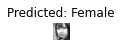

GroudthTruth:  Female


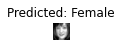

GroudthTruth:  Female


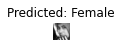

GroudthTruth:  Female


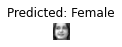

GroudthTruth:  Female


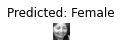

GroudthTruth:  Female


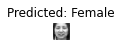

GroudthTruth:  Female


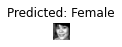

GroudthTruth:  Female


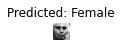

GroudthTruth:  Female


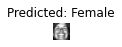

GroudthTruth:  Female


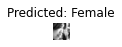

GroudthTruth:  Female


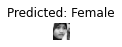

GroudthTruth:  Female


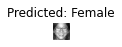

GroudthTruth:  Female


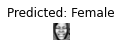

GroudthTruth:  Female


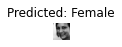

GroudthTruth:  Female


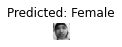

GroudthTruth:  Female


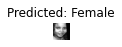

GroudthTruth:  Female


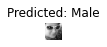

GroudthTruth:  Female


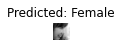

GroudthTruth:  Female


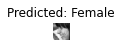

GroudthTruth:  Female


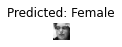

GroudthTruth:  Female


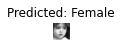

GroudthTruth:  Female


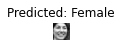

In [ ]:
out = torchvision.utils.make_grid(inputs)

visualize_model(model)
plt.ioff()
plt.show()